# linear-models

geshun

In [ ]:
reticulate::use_condaenv("base")

In [ ]:
import pandas as pd
import statsmodels.api as sm
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
plt.style.use('seaborn-whitegrid')

## Linear Models

A model is a representation of the real world. A company ($KN^3$)
engages Facebook ad as a marketing strategy. The company wants to find a
way to increase its revenue and control the cost of advertisement. If we
can find an association between ad cost and revenue
(i.e. $revenue = f(ad) + \epsilon$) the company might be able to achieve
its goals. The whole idea is determining what this $f$ is. Realize that
our $f$ is just approximating (since it’s a model and not the real
thing) so we add the error term $\epsilon$. The form this function $f$
takes defines if we have a linear model.

A linear model can be generally expressed as

$$
\hat{y}_i = \sum_{j=1}^{n}w_jx_{ij} = w_1x_{i1} + \dots + w_nx_{in}
$$

where $n$ is the number of features and $i$ is the number of
observations (examples).

1.  $w_j$ weights or parameters to be estimated using data
2.  $\hat{y}_i$ is a linear combination of weighted features
3.  the form $\hat{y}_i$ takes depends on if we have regression or
    classification problem

We are saying revenue is just achieved if we scale our cost of
advertisement by a factor. However, we can also conceive a scenario
where we want to talk about revenue even if no advertisement is made. In
that case, we need to include the bias term $w_o$.

$$
\sum_{j=1}^{n}w_jx_{ij} + w_o = \sum_{j=0}^{n}w_jx_{ij}
$$

where $x_{i0} = 1$

Consider a simple case of no intercept:

$$
\begin{bmatrix}
12000 \\ 23000 \\ 15000 \\ 10000 \\ 18000
\end{bmatrix} = 
w\begin{bmatrix}
300 \\ 450 \\ 360 \\ 300 \\ 400
\end{bmatrix}
$$

$w$ is the parameter to be estimated

Suppose we assume that the revenue generated is directly propositional
to the cost of ad. That is $y\:\alpha\: x$. And thus, $y = wx$ . If
$y = 12000$ and $x = 300$ find the constant of proportionality.

$12000 = 300w \rightarrow w = 12000 / 300 = 40$. Thus, revenue is 40
folds of cost of ad.

In [ ]:
def compute_weight(revenue, ad_cost):
  return revenue / ad_cost

weight = compute_weight(12000, 300)

def predict_revenue(ad_cost, weight):
  return ad_cost * weight

# how we know how our model is doing
def find_errors(revenue, prediction):
  return revenue - prediction

revenue = np.array([12000, 23000, 15000, 10000, 18000])
ad_cost = np.array([300, 450, 360, 300, 400])

revenue

array([12000, 23000, 15000, 10000, 18000])

array([    0.,  5000.,   600., -2000.,  2000.])

1.  Depending on our choice of revenue and corresponding cost of ad, we
    come up with a weight. There are couple of issues. First, we did not
    use all our revenues and ad cost and hence what we come up with is
    not a reflective of all the revenues we are considering
2.  The error is not a single value that we can easily interpret. It is
    a vector. Essentially, our error vector asks the question: how is
    our prediction similar or close to the actual revenue.

Predicting with averages

In [ ]:
avg_revenue = np.mean(revenue)
avg_ad_cost = np.mean(ad_cost)

weight = compute_weight(avg_revenue, avg_ad_cost)

revenue

array([12000, 23000, 15000, 10000, 18000])

array([ -928.17679558,  3607.73480663,  -513.8121547 , -2928.17679558,
         762.43093923])

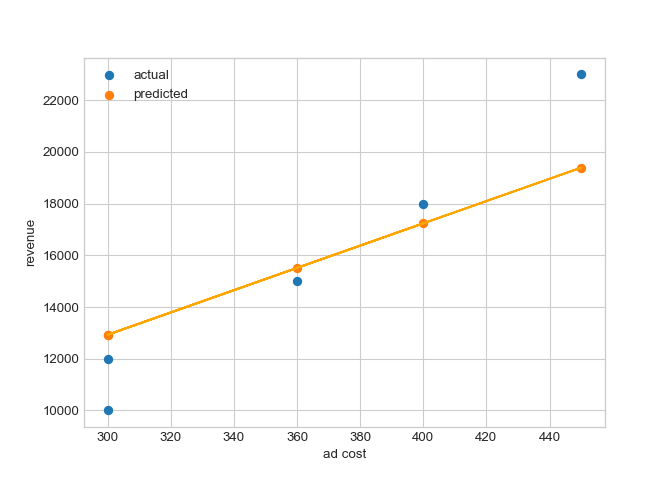

In [ ]:
def plot_model(pred):
  plt.clf()
  plt.scatter(ad_cost, revenue, label="actual")
  plt.scatter(ad_cost, pred, label="predicted")
  plt.plot(ad_cost, pred, color="orange")
  plt.xlabel('ad cost')
  plt.ylabel('revenue')
  plt.legend()
  plt.show()

plot_model(pred)

Euclidean Distance

$$
\sum_{i=1}^n e_i^2 = \sum_{i = 1}^{n}(y - \hat{y})^2
$$

In [ ]:
def euclidean_error(actual, pred):
  return sum((actual - pred) ** 2)

euclidean_error(revenue, pred) ** (1/2)

4826.674405053534

Generalization of norm (how a mathematician talk about distance -
$\mathcal{L}^p$ norm

$$
||\hat{e}|| = \left(\sum_{i = 1}^{n}|e_i|^p\right)^{\frac{1}{p}}
$$

Analytic (Normal or Close Form) Solution. This minimizes the Euclidean
distance between the actual and predicted.

In [ ]:
X, y = ad_cost, revenue
X = X.reshape(-1, 1)
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([43.96667163])

$$
y = Xb
$$

$$
X^Ty = X^TXb \rightarrow b = (X^TX)^{-1}X^Ty
$$

In [ ]:
df = pd.DataFrame({"ad_cost": ad_cost, "revenue": revenue})
df.corr()

          ad_cost   revenue
ad_cost  1.000000  0.986055
revenue  0.986055  1.000000

In [ ]:
reg = LinearRegression()
reg.fit(df[["ad_cost"]], df.revenue)

LinearRegression()

0.9723050655037573

In [ ]:
y_pred = reg.predict(df.drop(['revenue'], axis=1))
r2_score(df.revenue, y_pred)

0.9723050655037573

763.3488205276457

710.42654028436

In [ ]:
mod = sm.OLS(df[["revenue"]], df[["ad_cost"]])
reg = mod.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
Dep. Variable:                revenue   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              228.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    0.000112
Time:                        10:46:38   Log-Likelihood:                         -45.425
No. Observations:                   5   AIC:                                      92.85
Df Residuals:                       4   BIC:                                      92.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      

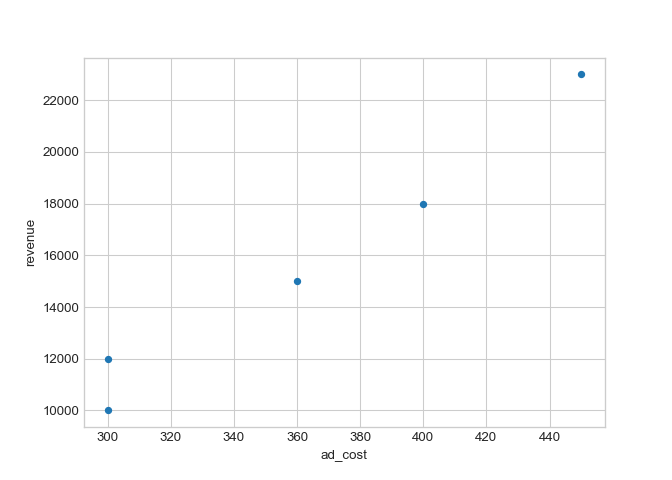

In [ ]:
df.plot.scatter(x="ad_cost", y="revenue")
plt.show()